### Indice - Predicition of the trends
1. [Time Series Analysis (if needed)](#timeseries)
2. [Feature Engineering](#featureengineering)
3. [Select Modeling Approach](#modeling)
4. [Model Training and Validation](#modelvalidation)
5. [Evaluation Metrics](#evaluation)

### In the file Results
6. Interpret Results
7. Communicate Findings

### Monotoring
8. Iterative Improvement

In [1]:
import sys
import os

dir = os.path.dirname('../Toolkit/DataExplorationToolkit.py')
sys.path.append(dir)

import DataExplorationToolkit as dtl
feature_selector = dtl.FeatureSelector()
visualizer=dtl.Visualization()
data_quality=dtl.DataQuality()
model_evaluation=dtl.ModelEvaluation()




import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("Datasets/shopping_trends_updated.csv")
df.head()






,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.10,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.10,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.10,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.50,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.70,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Time Series Analysis<a id='timeseries'></a>



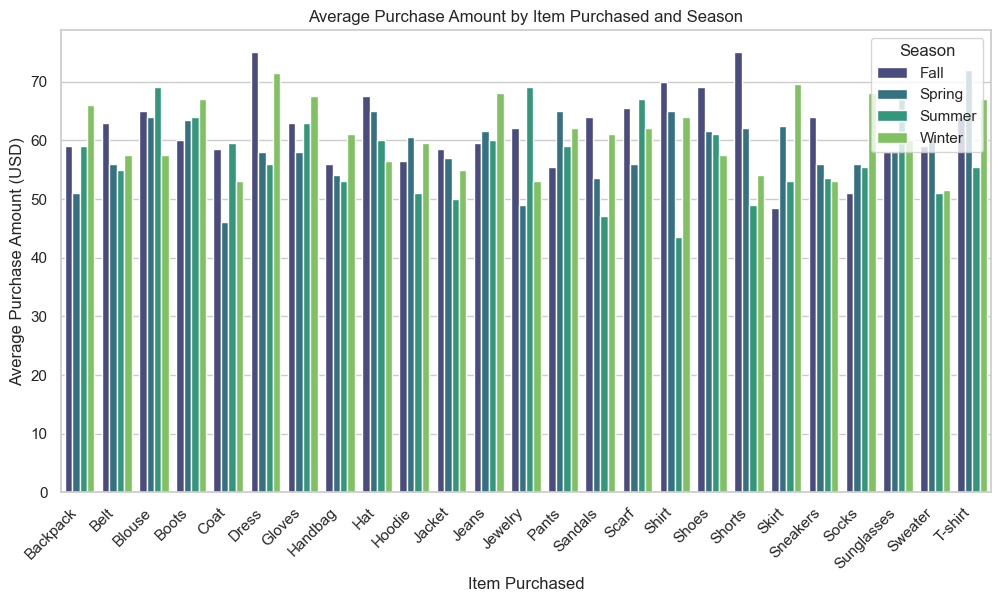

In [2]:
####!! doesnt look like it is possible to predict the thrends using ML models, but you can analyse with grapths. !!####



# Interesting plot - Purchase Amount (USD) for each subcategory "Item Purchased" buy Season


import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with the necessary columns

# Group by 'Item Purchased' and 'Season' and calculate the average 'Purchase Amount'
grouped_data = df.groupby(['Item Purchased', 'Season'])['Purchase Amount (USD)'].median().reset_index()

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Item Purchased', y='Purchase Amount (USD)', hue='Season', data=grouped_data, palette='viridis')

# Add labels and title
plt.title('Average Purchase Amount by Item Purchased and Season')
plt.xlabel('Item Purchased')
plt.ylabel('Average Purchase Amount (USD)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show legend
plt.legend(title='Season')

# Show the plot
plt.show()


### Feature Engineering<a id='featureengineering'></a>


- Try just creating a prediction model with the:
    - target - Item Purchased and  Purchased Amount(usd)
    - Variables - Age, Gender, Category, Location, Size, Season, Previous Purchases, Frequency of purchases 


Extract new Values

In [3]:

#Extract new values
# avg, median,...
# Its not 

# feature selection
# most important features (random forest or other to search for them)

from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns


# TARGET - Purchase Amount (USD)
list_to_not_include=['Customer ID']
cat_col_forced=['Item Purchased','Location','Color']



list_to_drop=['Customer ID']

#target='Purchase Amount (USD)'
target='Gender'

list_important_features,df_importance=feature_selector.most_important_features(df,target,10,list_to_drop,list_to_not_include,cat_col_forced,all_features=False)
df_importance

df_importance_top5=df_importance[:10]
top5=list_important_features[:10]


#prepare data: 
#experiment with data as it is, Uniform, and with transformed data

top5.append(target)

df_aux=df[top5] 

['Promo Code Used', 'Discount Applied', 'Subscription Status', 'Previous Purchases', 'Size', 'Shipping Type', 'Season', 'Purchase Amount (USD)', 'Frequency of Purchases', 'Review Rating']                     index  Gender
0         Promo Code Used    0.60
1        Discount Applied    0.60
2     Subscription Status    0.42
3      Previous Purchases    0.04
4                    Size    0.02
5           Shipping Type    0.02
6                  Season    0.02
7   Purchase Amount (USD)    0.01
8  Frequency of Purchases    0.01
9           Review Rating    0.01


In [4]:
# Embed the categorical and binary features
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

binary_cols, cat_cols, num_cols, text_cols = feature_selector.return_columns_by_type(df_aux, list_to_not_include, cat_col_forced)

for col in cat_cols:
    df_aux[col] = label_encoder.fit_transform(df_aux[col])

for col in binary_cols:
    df_aux[col] = label_encoder.fit_transform(df_aux[col])

df_aux.head()

,Promo Code Used,Discount Applied,Purchase Amount (USD),Age,Location,Previous Purchases,Review Rating,Color,Item Purchased,Frequency of Purchases,Gender
0,1,1,53,55,16,14,3.10,7,2,3,1
1,1,1,64,19,18,2,3.10,12,23,3,1
2,1,1,73,50,20,23,3.10,12,11,6,1
3,1,1,90,21,38,49,3.50,12,14,6,1
4,1,1,49,45,36,31,2.70,21,2,0,1


### Select Modeling Approach<a id='modeling'></a>


In [5]:
#Example of regression

# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
model = LinearRegression()


# Choose features and target variable
X = df_aux.drop(['Purchase Amount (USD)'], axis=1)
y = df_aux['Purchase Amount (USD)']

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the chosen model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate performance
model_evaluation.evaluate_regression_model(y_test,predictions)
# I will not even try to improve the results, this is just to support the toolkit

{'Mean Squared Error': 564.7424251943569,
 'Mean Absolute Error': 20.742222492887656,
 'R-squared (R2)': -0.009221257958741846,
 'Mean Percentage Error (MPE)': 48.15067788921179}

### Model Training and Validation<a id='modelvalidation'></a>


In [6]:
# Example of classification

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Choose features and target variable
X = df_aux.drop(['Gender'], axis=1)
y = df_aux['Gender']

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier (for classification)
classifier = RandomForestClassifier()

# Train the model
classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test)

# Evaluate performance
metrics_model_evaluation=model_evaluation.evaluate_binary_model(y_test,predictions)


### Evaluation Metrics<a id='evaluation'></a>

In [7]:
#F1 score, acc
#create a method on toolkit that returns all metrics by order
metrics_model_evaluation

{'F1 Score': 0.7968285431119921,
 'ROC-AUC': 0.7435163996948894,
 'Accuracy': 0.7371794871794872,
 'Precision': 0.8796498905908097,
 'Recall': 0.7282608695652174}

In [8]:
import json
with open('Results/classification_results.json', 'w') as json_file:
    json.dump(metrics_model_evaluation, json_file)